In [ ]:
###   Importação de bibliotecas   ###

In [1]:
import supercon_dados as tsd
import supercon_funcoes_apoio_ML as tsf
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
### Divisão dos dados que serão usados em um processão de validação cruzada para obtenção de melhores parâmetros  ###

In [2]:
X_treino, X_teste, Y_treino, Y_teste = tsf.divisao_dados_treinamento(0.2,tsd.X_modelagem,tsd.Y_modelagem)


In [3]:
reg_floa = RandomForestRegressor(n_estimators=800,max_depth=None,min_samples_split=2)
reg_floa.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [4]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', reg_floa.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(reg_floa.predict(X_treino),Y_treino)))


 R^2: 
 0.9785403668335481 
 RMSE : 
 5.011242995776738


In [5]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', reg_floa.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(reg_floa.predict(X_teste),Y_teste)))


 R^2: 
 0.9314259007515217 
 RMSE : 
 8.935306300135691


In [ ]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [8]:
###   Chamando a classe para o processo   ###

reg_floa = RandomForestRegressor(max_features=None)

In [9]:
###   Parâmetros a serem avalizados   ###

parametros = {'n_estimators' : [500,600,700], 'max_depth': [10,20,40,60], 'min_samples_split':[4,5,7,9],
             'min_samples_leaf':[2,4,5,6]}

In [11]:
resultados_analise_parametros = tsf.obter_parametros(reg_floa, parametros, X_treino,Y_treino)

In [12]:
###   Imprime o resultado dos os dados treinados   ###

resultados_analise_parametros.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [13]:
###   Treina o modelo com os melhores prâmetros   ###

reg_floa = resultados_analise_parametros.best_estimator_
reg_floa.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=4,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [14]:
###   Imprime o resultado dos os dados treinados   ###

print('\n R^2: \n', reg_floa.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(reg_floa.predict(X_treino),Y_treino)))


 R^2: 
 0.9738380127072168 
 RMSE : 
 5.533114794453279


In [15]:
###   Imprime o resultado sobre dados nunca treinados   ###

print('\n R^2: \n', reg_floa.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(reg_floa.predict(X_teste),Y_teste)))


 R^2: 
 0.9309730093939738 
 RMSE : 
 8.964763948613736


In [ ]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros 2   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [16]:
###   Parâmetros a serem avalizados   ###

parametros2 = {'n_estimators' : [550,600,650], 'max_depth': [20,25,30], 'min_samples_split':[3,4],
             'min_samples_leaf':[2]}

In [17]:
reg_floa2 = RandomForestRegressor(max_features=None)

In [18]:
resultados_analise_parametros2 = tsf.obter_parametros(reg_floa2, parametros2, X_treino,Y_treino)

In [19]:
treino2=resultados_analise_parametros2.best_estimator_
treino2.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino2.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino2.predict(X_treino),Y_treino)))


 R^2: 
 0.9737914724091341 
 RMSE : 
 5.538034114735175


In [21]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino2.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino2.predict(X_teste),Y_teste)))


 R^2: 
 0.9311158979089726 
 RMSE : 
 8.955480439411767


In [22]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros 3   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [23]:
reg_floa3 = RandomForestRegressor(max_features=None)

In [24]:
###   Parâmetros a serem avalizados   ###

parametros3 = {'n_estimators' : [300,600,625,800], 'max_depth': [18,20], 'min_samples_split':[3],
             'min_samples_leaf':[2]}

In [25]:
resultados_analise_parametros3 = tsf.obter_parametros(reg_floa3, parametros3, X_treino,Y_treino)

In [26]:
treino3=resultados_analise_parametros3.best_estimator_
treino3.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [29]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino3.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino3.predict(X_treino),Y_treino)))


 R^2: 
 0.9737570873349902 
 RMSE : 
 5.541665820011726


In [30]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino3.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino3.predict(X_teste),Y_teste)))


 R^2: 
 0.9311916785456755 
 RMSE : 
 8.950553041499006


In [31]:
###   Processo de validação cruzada visando a obtenção de melhores parâmetros 4   ###
###   O processo trabalha sobre as funções criadas no arquivo TCC_supercon_funcoes_apoio_M   ###

In [32]:
parametros4 = {'n_estimators' : [600,650,700,750,800,850], 'max_depth': [20], 'min_samples_split':[3],
             'min_samples_leaf':[2]}

In [33]:
reg_floa4 = RandomForestRegressor(max_features=None)

In [34]:
resultados_analise_parametros4 = tsf.obter_parametros(reg_floa4, parametros4, X_treino,Y_treino)

In [35]:
treino4=resultados_analise_parametros4.best_estimator_
treino4.fit(X_treino,Y_treino)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=3,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [36]:
###   Imprime o resultado dos dados treinados   ###

print('\n R^2: \n', treino4.score(X_treino,Y_treino), '\n RMSE : \n',np.sqrt(mean_squared_error(treino4.predict(X_treino),Y_treino)))


 R^2: 
 0.9738877545151801 
 RMSE : 
 5.5278522339801315


In [37]:
###   Imprime o resultado dos dados nunca treinados   ###

print('\n R^2: \n', treino4.score(X_teste,Y_teste), '\n RMSE : \n',np.sqrt(mean_squared_error(treino4.predict(X_teste),Y_teste)))


 R^2: 
 0.9313370539268344 
 RMSE : 
 8.94109286259463


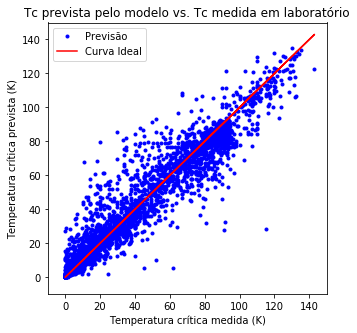

In [39]:
###   Visualização dos resultados de treinamento sobre dados nunca treinados pelo modelo   ###

import matplotlib.pyplot as plt

print_x = Y_teste
print_y = treino4.predict(X_teste)

f, ax = plt.subplots(figsize=(5, 5))
plt.title('Tc prevista pelo modelo vs. Tc medida em laboratório')

plt.xlabel('Temperatura crítica medida (K)')
plt.ylabel('Temperatura crítica prevista (K)')
plt.legend('Previsão')
plt.plot(print_x,print_y, 'b.',label = 'Previsão')
plt.plot(print_x,print_x, 'r-', label = 'Curva Ideal')
plt.legend()

plt.axis([-10,150,-10,150])

plt.show()